# Boston house price prediction

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data In this dataset, each row describes a boston town or suburb. There are 506 rows and 13 attributes (features) with a target column (price).

In [3]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics

from sklearn.datasets import load_boston

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [18]:
#importing boston dataset
boston = load_boston()

In [19]:
# Initializing the dataframe
data = pd.DataFrame(boston.data)

In [11]:
#seeing the dataset 
data.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15


In [12]:
#adding the names of features with respective data
data.columns=boston.feature_names
#Adding target variable to dataframe

In [14]:
#cheking columns before adding features for target value i.e price
data.shape

(506, 13)

In [21]:
data['PRICE'] = boston.target 
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


CRIM: per capita crime rate by

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: nitric oxides concentration (parts per 10 million)

RM: average number of rooms per dwelling

AGE: proportion of owner-occupied units built prior to 1940

DIS: weighted distances to ﬁve Boston employment centers

RAD: index of accessibility to radial highways

TAX: full-value property-tax rate per $10,000

PTRATIO: pupil-teacher ratio by town

B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town

LSTAT: % lower status of the population

PRICE: Median value of owner-occupied homes in $1000s We can see that the input attributes have a mixture of units.

In [22]:
#checking columns after adding target values
data.shape

(506, 14)

In [24]:
# all datas are properly associated with their types
data.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
PRICE    float64
dtype: object

In [27]:
#Statistics of dataset described.
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [26]:
#So no data is missing since all sums are 0.
data.isnull().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
PRICE    0
dtype: int64

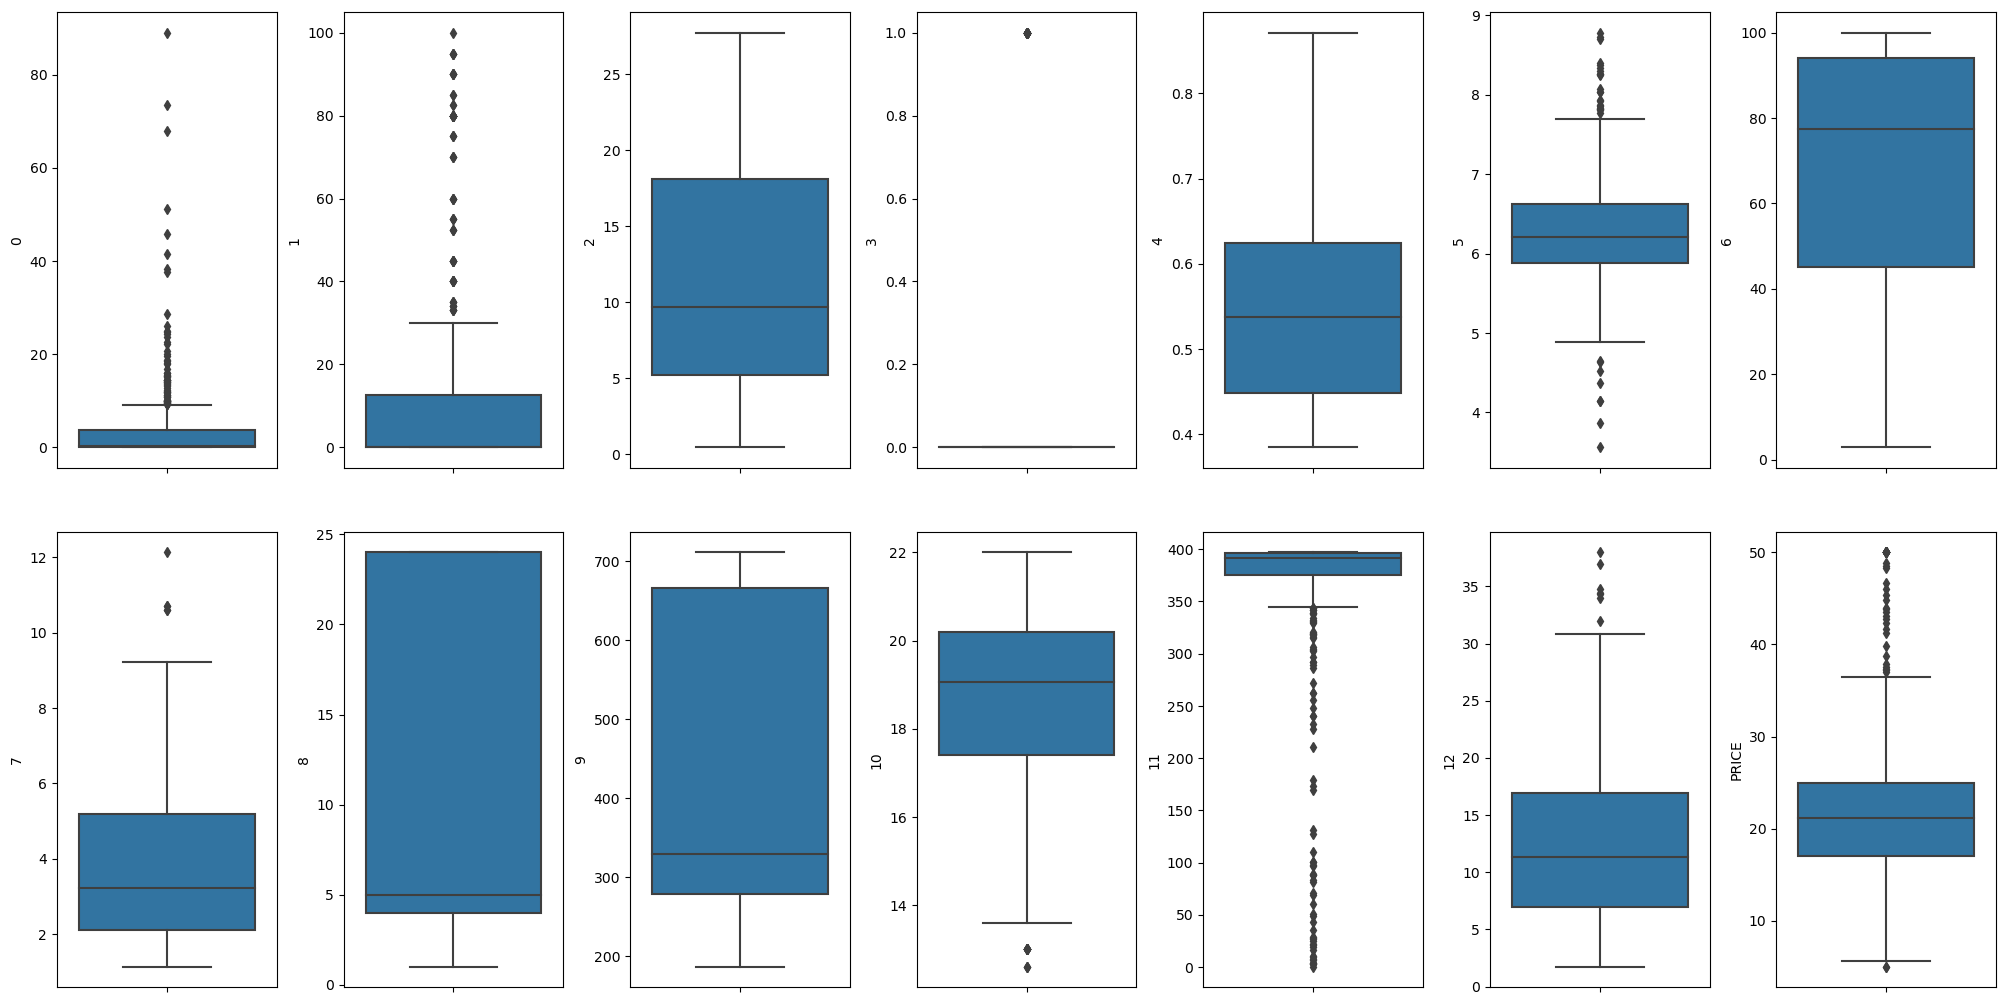

In [30]:
#checking outliers using boxplot
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
count = 0
axs = axs.flatten()
for tar,var in data.items():
    sns.boxplot(y=tar, data=data, ax=axs[count])
    count= count+1
plt.tight_layout(pad=0.5, w_pad=0.78, h_pad=4.0)

In [31]:
#outliers in percentage
for tar,var in data.items():
    q1=var.quantile(0.25)
    q3=var.quantile(0.75)
    iqr=q3-q1
    var_col=var[(var<=q1-1.5*iqr) | (var>=q3+1.5*iqr)]
    perc=np.shape(var_col)[0]*100.0/np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (tar, perc)) 

Column 0 outliers = 13.04%
Column 1 outliers = 13.44%
Column 2 outliers = 0.00%
Column 3 outliers = 100.00%
Column 4 outliers = 0.00%
Column 5 outliers = 5.93%
Column 6 outliers = 0.00%
Column 7 outliers = 0.99%
Column 8 outliers = 0.00%
Column 9 outliers = 0.00%
Column 10 outliers = 2.96%
Column 11 outliers = 15.22%
Column 12 outliers = 1.38%
Column PRICE outliers = 7.91%


In [33]:
#feature selection
#checking the correlation between two features.
corr=data.corr()
corr

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

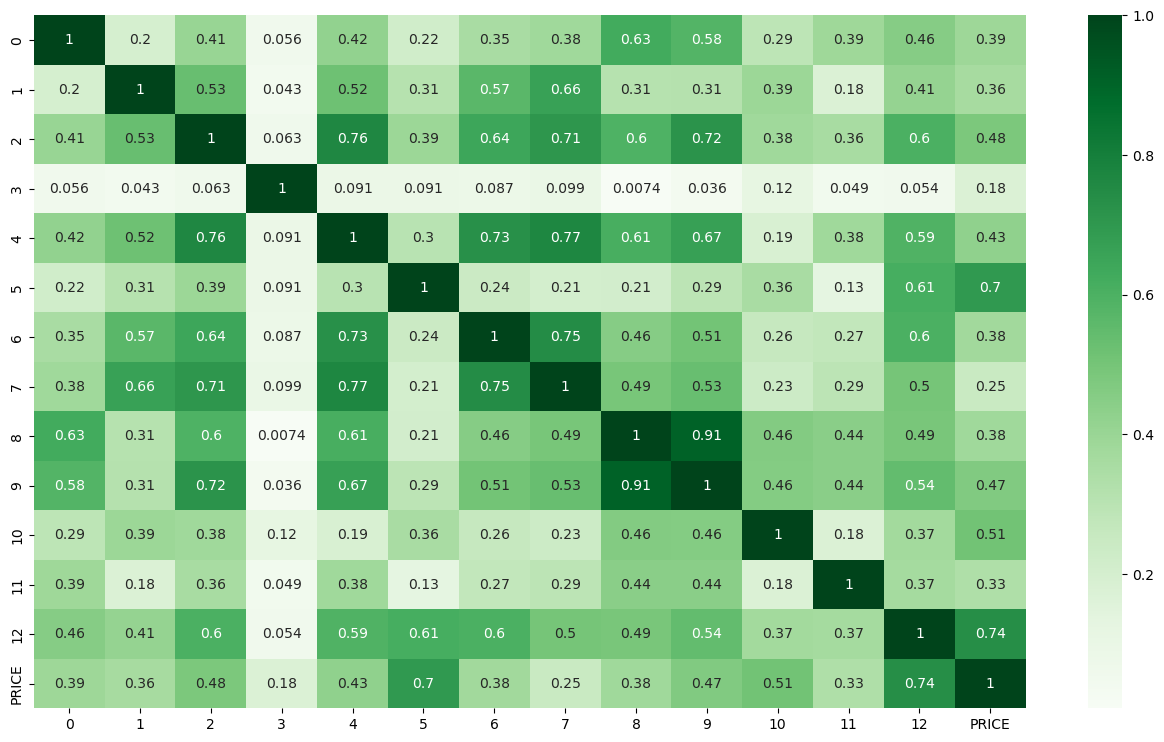

In [56]:
#using a heatmap to see correlation between features more clearly.
plt.figure(figsize=(16,9))
sns.heatmap(corr.abs(), annot=True,cmap='Greens')

Model build

1-Split Data in Train/Test for both X and y

2-Fit/Train Scaler on Training X Data

3-Scale X Test Data

4-Create Model

5-Fit/Train Model on X Train Data

6-Evaluate Model on X Test Data (by creating predictions and comparing to Y_test)

7-Adjust Parameters as Necessary and repeat steps 5 and 6

In [36]:
# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']

In [37]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [38]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [39]:
#splitting the data to train and test. checking the validation of the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)

In [40]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
Scaled_X_train=Scaler.fit_transform(X_train)
Scaled_X_test=Scaler.fit_transform(X_test)

In [41]:
Scaled_X_train


array([[-0.28007327, -0.48685737,  1.15021607, ..., -1.80913346,
        -0.67575241,  0.21442135],
       [ 0.33176824, -0.48685737,  0.93964646, ...,  0.74870221,
        -2.76006277, -0.12804248],
       [ 0.25932352, -0.48685737,  0.93964646, ...,  0.74870221,
         0.4461973 , -0.31211679],
       ...,
       [-0.14323752, -0.48685737,  0.93964646, ...,  0.74870221,
         0.16552219,  0.0588857 ],
       [-0.40139868, -0.48685737,  2.01383602, ...,  0.23713508,
         0.31878345,  0.26864479],
       [-0.33216001,  0.31519664, -1.07072421, ..., -2.59973721,
         0.39793448, -0.35349784]])

In [42]:
Scaled_X_test


array([[-0.41326182,  1.10863427, -1.28620871, ...,  0.06709442,
         0.39334788, -0.45400316],
       [-0.4170703 ,  2.42174598, -1.17165684, ..., -1.22566723,
         0.39346147, -0.98833494],
       [-0.41545413,  3.39442132, -1.10445308, ..., -0.99481694,
         0.43355694, -1.03765787],
       ...,
       [-0.41148716, -0.49628004,  0.50232782, ..., -0.85630676,
         0.38675996, -0.34987697],
       [-0.41794375,  4.36709666, -1.41756152, ..., -1.45651753,
         0.38812297, -1.13630374],
       [-0.41132751, -0.49628004, -0.93338895, ...,  0.11326448,
         0.41367958, -0.52113715]])

# Linear Regression Model


In [49]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)


LinearRegression()

In [51]:
# Value of y intercept
lm.intercept_

31.478696182125685

In [50]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,0.0,-0.145532
1,1.0,0.060672
2,2.0,-0.000592
3,3.0,2.355468
4,4.0,-16.023913
5,5.0,3.955193
6,6.0,0.000107
7,7.0,-1.562768
8,8.0,0.268553
9,9.0,-0.011798


In [52]:
#predicting on training data
y_pred=lm.predict(X_train)
#Model Evaluation and error calculations
print('R^2 =',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2 =',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE =',metrics.mean_absolute_error(y_train, y_pred))
print('MSE =',metrics.mean_squared_error(y_train, y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2 = 0.7588890959138562
Adjusted R^2 = 0.7480432766989086
MAE = 3.1532948788568373
MSE = 19.163308562607487
RMSE = 4.377591639544224


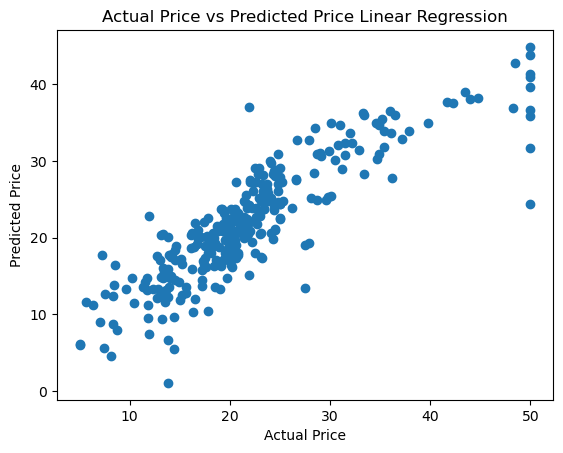

In [53]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price Linear Regression")
plt.show()

In [54]:
#Check for Multicollinearity
#Variance Inflation Factor
R_square = lm.score(X_test,y_test)
VIF_LR = 1/(1- R_square)
VIF_LR

3.3970163982366244

In [55]:
#predicting the data using above model
y_tpred= lm.predict(X_test)
#Model Evaluation
tpred_linreg = metrics.r2_score(y_test, y_tpred)
print('R^2:', tpred_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_tpred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_tpred))
print('MSE:',metrics.mean_squared_error(y_test, y_tpred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_tpred)))
score = metrics.r2_score(y_test, y_tpred)
print("Accuracy: {} %".format(round((score*100),2)))

R^2: 0.7056240292160216
Adjusted R^2: 0.6853759465695046
MAE: 3.400338958280649
MSE: 26.75002640094018
RMSE: 5.172042768668892
Accuracy: 70.56 %
